In [1]:
import sys
sys.path.append('F:\Cambridge\Project\MHMC-for-VAE\change_of_variable')
sys.path.append('F:\Cambridge\Project\MHMC-for-VAE\hmc_pytorch')
from change_of_variable_pytorch import * 
from hmc_base_pytorch import *
from hmc_unconstrained_pytorch import *
import numpy as np
import math
import torch
import torch.nn as nn


In [2]:
def log_prior(z):
    dim = z.shape[0]
    mean = torch.zeros(dim).cuda()
    cov = 2*torch.eye(dim).cuda()
    m = MultivariateNormal(mean, cov)
    m.requires_grad=True
    return m.log_prob(z)

In [3]:
def multivariate_normal_diagonal_logpdf(mean, cov_diag, x):
     # number of samples
    k = x.shape[0] # dimension
    #print(x.is_cuda)
    #print(mean.is_cuda)
    #print(cov_diag.is_cuda)
    t1 = -0.5*(x - mean)*(1/cov_diag)*(x-mean)
    t1 = torch.sum(t1, dim=1)
    t2 = 0.5*k*torch.log(torch.tensor([2*math.pi]).cuda()) + 0.5*torch.sum(torch.log(cov_diag),dim=1)
    return t1 - t2

In [ ]:
z = torch.ones()
mean = torch.ones([1,2], requires_grad=True).cuda()
cov_diag = torch.ones([1,2], requires_grad=True).cuda()
res = -multivariate_normal_diagonal_logpdf(mean, cov_diag, z_cuda)

In [13]:
def energy(z, cache):
    z.retain_grad()
    z_cuda = z.cuda()
    mean = torch.ones([1,2], requires_grad=True).cuda()
    cov_diag = torch.ones([1,2], requires_grad=True).cuda()
    res = -multivariate_normal_diagonal_logpdf(mean, cov_diag, z_cuda)
    print("z: "+str(z.shape))
    print("energy: "+str(res))
    return res

In [14]:
sampler = IsotropicHmcSampler(energy, energy_grad=None, prng=None, mom_resample_coeff=1., dtype=np.float64)

In [15]:
z1_list = []
z2_list = []
init = torch.ones(2, requires_grad=True).cuda()
mass_matrix = 2*torch.eye(2).cuda()
pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.001, 5, 50, mass_matrix)
for i in range(500):
    z1_list.append(pos_samples[i][0].item())
    z2_list.append(pos_samples[i][1].item())

z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
Sample: 1
tensor([[ 0.5000,  0.0000],
        [ 0.0000,  0.5000]], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
pos: tensor([ 1.,  1.])
grad: tensor([ 0.,  0.])
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-04 *
       [-3.2645,  0.6115], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-04 *
       [-6.5291,  1.2231], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-04 *
       [-9.7936,  1.8346], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-03 *
       [-1.3058,  0.2446], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
hamiltonian_p: tensor([ 1.9482], device='cuda:0')
z: torch.Size([2]

z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-03 *
       [-9.8363, -0.0982], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
hamiltonian_p: tensor([ 1.8414], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
Sample: 11
tensor([[ 0.5000,  0.0000],
        [ 0.0000,  0.5000]], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
pos: tensor([ 0.9901,  0.9998])
grad: tensor(1.00000e-03 *
       [-9.8581, -0.1531])
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-1.1211,  0.0161], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-1.2563,  0.0476], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-1.3916,  0.079

loop grad: tensor(1.00000e-02 *
       [-1.2001,  1.1672], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
hamiltonian_p: tensor([ 2.8367], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
Sample: 19
tensor([[ 0.5000,  0.0000],
        [ 0.0000,  0.5000]], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
pos: tensor([ 0.9878,  1.0126])
grad: tensor(1.00000e-02 *
       [-1.2249,  1.2640])
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-1.1677,  1.3470], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-1.1106,  1.4301], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-1.0534,  1.5131], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.838

z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
hamiltonian_p: tensor([ 2.4000], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
Sample: 27
tensor([[ 0.5000,  0.0000],
        [ 0.0000,  0.5000]], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
pos: tensor([ 1.0014,  1.0123])
grad: tensor(1.00000e-02 *
       [ 0.1447,  1.2341])
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [ 0.0941,  1.2351], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [ 0.0436,  1.2362], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-0.0070,  1.2372], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [-0.0575,  1.238

loop grad: tensor(1.00000e-02 *
       [ 1.3317,  0.5527], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [ 1.3711,  0.5366], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
hamiltonian_p: tensor([ 2.0191], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
Sample: 36
tensor([[ 0.5000,  0.0000],
        [ 0.0000,  0.5000]], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
pos: tensor([ 1.0141,  1.0052])
grad: tensor(1.00000e-02 *
       [ 1.4105,  0.5205])
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [ 1.3629,  0.5675], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8380], device='cuda:0')
loop grad: tensor(1.00000e-02 *
       [ 1.3154,  0.6146], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.838

loop grad: tensor(1.00000e-03 *
       [ 6.2441,  4.2846], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-03 *
       [ 6.5978,  3.1345], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
hamiltonian_p: tensor([ 3.2859], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
Sample: 45
tensor([[ 0.5000,  0.0000],
        [ 0.0000,  0.5000]], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
pos: tensor([ 1.0070,  1.0020])
grad: tensor(1.00000e-03 *
       [ 6.9515,  1.9844])
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-03 *
       [ 7.0115,  1.7130], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.8379], device='cuda:0')
loop grad: tensor(1.00000e-03 *
       [ 7.0716,  1.4417], device='cuda:0')
z: torch.Size([2])
energy: tensor([ 1.837

IndexError: index 50 is out of bounds for dimension 0 with size 50

In [28]:
np.var(z2_list)
np.mean(z2_list)

0.97106761455535884

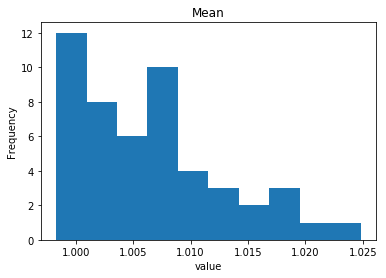

In [18]:
fig = plt.hist(z2_list)
plt.title('Mean')
plt.xlabel("value")
plt.ylabel("Frequency")
plt.savefig("abc.png")

(array([ 12.,   8.,   6.,  10.,   4.,   3.,   2.,   3.,   1.,   1.]),
 array([ 0.99830431,  1.0009531 ,  1.00360188,  1.00625067,  1.00889946,
         1.01154825,  1.01419704,  1.01684583,  1.01949462,  1.02214341,
         1.02479219]),
 <a list of 10 Patch objects>)

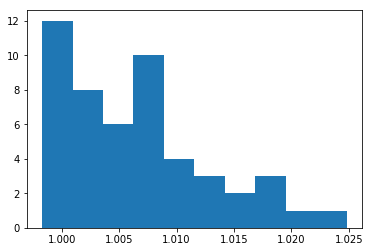

In [16]:
plt.hist(z2_list)

In [15]:
l1 = []
l2 = []
t = torch.Tensor(2)
for i in range(200):
    x = t.normal_()
    l1.append(x[0].item())
    l2.append(x[1].item())

0.0010980406589806079

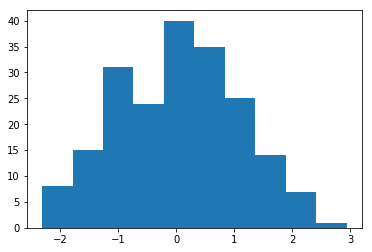

In [21]:
plt.hist(l2)
np.mean(l1)

In [5]:
sampler = IsotropicHmcSampler(energy, energy_grad=None, prng=None, mom_resample_coeff=0., dtype=np.float64)

z1_list = []
#z2_list = []
m = Normal(torch.tensor([0.0]), torch.tensor([1.0]))

init = torch.zeros(1, requires_grad=True).cuda()
mass_matrix = torch.tensor([1.]).cuda()
pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.01, 5, 1, mass_matrix)
for i in range(1):
    z1_list.append(pos_samples[i].item())
    
"""
for i in range(500):
    init = torch.ones(1, requires_grad=True).cuda()
    mass_matrix = torch.tensor([1.]).cuda()
    mom = m.sample().cuda()
    pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.01, 10, 2, mass_matrix,mom)
    z1_list.append(pos_samples[1][0].item())
"""
"""
for i in range(100):
    z1_list.append(pos_samples[i].item())
#z1_list.append(pos_samples[1][0].item())
    #z2_list.append(pos_samples[1][1].item())
"""

Sample: 1
Sample: 2
Sample: 3
Sample: 4
Sample: 5
Sample: 6
Sample: 7
Sample: 8
Sample: 9
Sample: 10
Sample: 11
Sample: 12
Sample: 13
Sample: 14
Sample: 15
Sample: 16
Sample: 17
Sample: 18
Sample: 19
Sample: 20
Sample: 21
Sample: 22
Sample: 23
Sample: 24
Sample: 25
Sample: 26
Sample: 27
Sample: 28
Sample: 29
Sample: 30
Sample: 31
Sample: 32
Sample: 33
Sample: 34
Sample: 35
Sample: 36
Sample: 37
Sample: 38
Sample: 39
Sample: 40
Sample: 41
Sample: 42
Sample: 43
Sample: 44
Sample: 45
Sample: 46
Sample: 47
Sample: 48
Sample: 49
Sample: 50
Sample: 51
Sample: 52
Sample: 53
Sample: 54
Sample: 55
Sample: 56
Sample: 57
Sample: 58
Sample: 59
Sample: 60
Sample: 61
Sample: 62
Sample: 63
Sample: 64
Sample: 65
Sample: 66
Sample: 67
Sample: 68
Sample: 69
Sample: 70
Sample: 71
Sample: 72
Sample: 73
Sample: 74
Sample: 75
Sample: 76
Sample: 77
Sample: 78
Sample: 79
Sample: 80
Sample: 81
Sample: 82
Sample: 83
Sample: 84
Sample: 85
Sample: 86
Sample: 87
Sample: 88
Sample: 89
Sample: 90
Sample: 91
Sample: 

'\nfor i in range(100):\n    z1_list.append(pos_samples[i].item())\n#z1_list.append(pos_samples[1][0].item())\n    #z2_list.append(pos_samples[1][1].item())\n'

2.1149381328467278

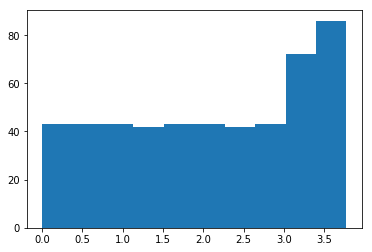

In [9]:
np.var(z1_list)
plt.hist(z1_list)
np.mean(z1_list)

In [ ]:
#h = plt.hist2d(z1_list, z2_list, bins = [100, 100])

In [4]:
mean = torch.tensor([[0.,0.,0.],[0.,0.,0.]]).cuda()
cov_diag = torch.tensor([[1.,1.,1.],[1.,1.,1.]]).cuda()
x = torch.tensor([[5.,0.5,0.],[1.,1.,0.]]).cuda()
multivariate_normal_diagonal_logpdf(mean, cov_diag, x)

tensor([-15.3818,  -3.7568], device='cuda:0')

In [20]:
mean.shape
torch.diag(cov_diag[0])

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]], device='cuda:0')

In [ ]:
def energy(y,cache):
    mean = 
    multivariate_normal_diagonal_logpdf(mean, cov_diag, x)

In [15]:
mean = torch.tensor([[1.,0.,0.],[0.,0.,0.]], requires_grad=True)
mean.shape

torch.Size([2, 3])

In [18]:
res = torch.sum(mean, dim=1)
res.shape

torch.Size([2])

In [17]:
res.backward()

RuntimeError: grad can be implicitly created only for scalar outputs